# Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Image (#27195): Which is digit '8'


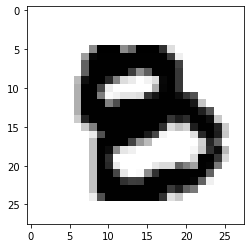

In [3]:
digit = np.random.randint(1,x_train.shape[0]) # Change to choose new digit
a = x_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

Image (#28377): Which is digit '6'


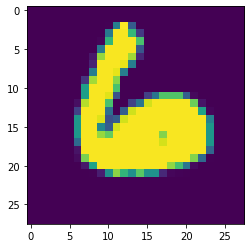

In [4]:
digit = np.random.randint(1,x_train.shape[0])
a = x_train[digit]
plt.imshow(a)
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

In [5]:
# summarize pixel values
print('Train: ', x_train.min(), x_train.max(), x_train.mean(), x_train.std())
print('Test: ', x_test.min(), x_test.max(), x_test.mean(), x_test.std())

Train:  0 255 33.318421449829934 78.56748998339798
Test:  0 255 33.791224489795916 79.17246322228644


In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')/ 255.0

# Prepocessing

(28, 28, 1)


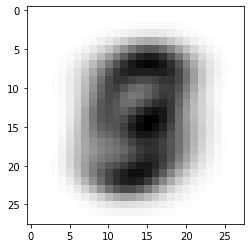

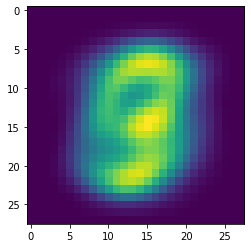

In [7]:
mean_img = np.mean(x_train,axis=0)
print(mean_img.shape)
plt.imshow(mean_img,cmap='gray_r')
plt.show()

plt.imshow(mean_img)
plt.show()

In [8]:
x_train_norm, x_test_norm = x_train - mean_img, x_test-mean_img

In [9]:
print(x_train_norm.shape)
print(x_test_norm.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


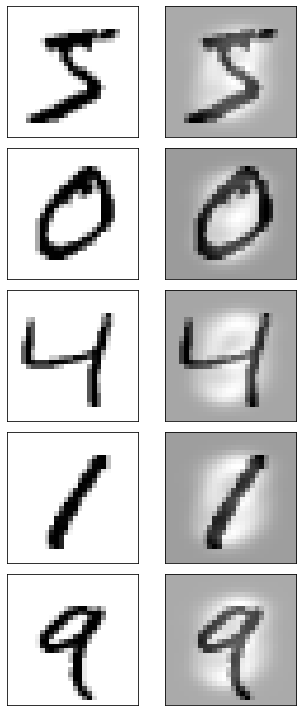

In [10]:
c = 0
plt.figure(figsize=(5,10))
for i in range(5):
    plt.subplot(5,2,c+1)
    plt.imshow(x_train[i],cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(5,2,c+2)
    plt.imshow(x_train_norm[i],cmap='gray_r')
    plt.xticks([])
    plt.yticks([])

    c += 2
    
plt.tight_layout()
plt.show()

# Model Building

In [12]:
from keras import models

In [14]:
def getModel():
    model = models.Sequential([
        Conv2D(filters=96, kernel_size=(11,11), strides=(1,1), activation='relu', input_shape=(28,28,1)),
        MaxPooling2D(pool_size=(3,3), strides=(2,2)),
        BatchNormalization(),
        # Second convolutional layer
        Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
        MaxPooling2D(pool_size=(3,3), strides=(2,2)),
        BatchNormalization(),
        # Third convolutional layer
        Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        # Fourth convolutional layer
        Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        BatchNormalization(),
        # Fifth convolutional layer
        Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        MaxPooling2D(pool_size=(3,3), strides=(2,2)),
        BatchNormalization(),
        # Flatten the output of the fifth convolutional layer
        Flatten(),
        # First fully connected layer
        Dense(units=4096, activation='relu'),
        Dropout(0.5),
        # Second fully connected layer
        Dense(units=4096, activation='relu'),
        Dropout(0.5),
        # Output layer
        Dense(units=10, activation='softmax')
    ])

    return model

In [15]:
model_1 = getModel()

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 18, 96)        11712     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 96)         0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 8, 8, 96)         384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 256)         614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 256)        0         
 2D)                                                             
                                                        

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

In [17]:

cb = EarlyStopping(monitor='val_loss', min_delta=0.02, patience=3, restore_best_weights=True)

model_history = []

model_1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)
h_1 = model_1.fit(x=x_train_norm, y=y_train,  epochs=25, batch_size=128, validation_split=0.3)

model_history.append(h_1)

Epoch 1/25
329/329 [==============================] - 22s 26ms/step - loss: 0.1978 - accuracy: 0.9397 - val_loss: 1.8670 - val_accuracy: 0.2918
Epoch 2/25
329/329 [==============================] - 8s 23ms/step - loss: 0.0478 - accuracy: 0.9851 - val_loss: 0.0744 - val_accuracy: 0.9783
Epoch 3/25
329/329 [==============================] - 8s 24ms/step - loss: 0.0306 - accuracy: 0.9900 - val_loss: 0.0680 - val_accuracy: 0.9828
Epoch 4/25
329/329 [==============================] - 8s 24ms/step - loss: 0.0253 - accuracy: 0.9919 - val_loss: 0.0625 - val_accuracy: 0.9839
Epoch 5/25
329/329 [==============================] - 8s 24ms/step - loss: 0.0218 - accuracy: 0.9927 - val_loss: 0.0667 - val_accuracy: 0.9847
Epoch 6/25
329/329 [==============================] - 8s 23ms/step - loss: 0.0180 - accuracy: 0.9943 - val_loss: 0.0686 - val_accuracy: 0.9844
Epoch 7/25
329/329 [==============================] - 8s 23ms/step - loss: 0.0155 - accuracy: 0.9949 - val_loss: 0.0767 - val_accuracy: 0.983

In [18]:
model_2=getModel()
model_2.compile(
    optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3),
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

h_2 = model_2.fit(x=x_train_norm, y=y_train,  epochs=25, batch_size=128, validation_split=0.3)

model_history.append(h_2)

Epoch 1/25
329/329 [==============================] - 10s 26ms/step - loss: 1.6198 - accuracy: 0.5312 - val_loss: 2.1517 - val_accuracy: 0.2776
Epoch 2/25
329/329 [==============================] - 8s 24ms/step - loss: 0.7416 - accuracy: 0.8626 - val_loss: 0.5541 - val_accuracy: 0.9099
Epoch 3/25
329/329 [==============================] - 8s 24ms/step - loss: 0.4088 - accuracy: 0.9241 - val_loss: 0.2545 - val_accuracy: 0.9485
Epoch 4/25
329/329 [==============================] - 8s 24ms/step - loss: 0.2742 - accuracy: 0.9455 - val_loss: 0.1845 - val_accuracy: 0.9587
Epoch 5/25
329/329 [==============================] - 8s 24ms/step - loss: 0.2054 - accuracy: 0.9580 - val_loss: 0.1469 - val_accuracy: 0.9642
Epoch 6/25
329/329 [==============================] - 8s 23ms/step - loss: 0.1647 - accuracy: 0.9658 - val_loss: 0.1236 - val_accuracy: 0.9693
Epoch 7/25
329/329 [==============================] - 8s 24ms/step - loss: 0.1379 - accuracy: 0.9715 - val_loss: 0.1072 - val_accuracy: 0.972

In [19]:
model_3=getModel()
model_3.compile(
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-3),
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

h_3 = model_3.fit(x=x_train_norm, y=y_train,  epochs=25, batch_size=128, validation_split=0.3)
model_history.append(h_3)

Epoch 1/25
329/329 [==============================] - 12s 25ms/step - loss: 0.3890 - accuracy: 0.9082 - val_loss: 0.5242 - val_accuracy: 0.8495
Epoch 2/25
329/329 [==============================] - 8s 25ms/step - loss: 0.0829 - accuracy: 0.9781 - val_loss: 0.3097 - val_accuracy: 0.9270
Epoch 3/25
329/329 [==============================] - 8s 24ms/step - loss: 0.0605 - accuracy: 0.9851 - val_loss: 0.1632 - val_accuracy: 0.9661
Epoch 4/25
329/329 [==============================] - 8s 25ms/step - loss: 0.0491 - accuracy: 0.9881 - val_loss: 0.0613 - val_accuracy: 0.9863
Epoch 5/25
329/329 [==============================] - 8s 25ms/step - loss: 0.0376 - accuracy: 0.9906 - val_loss: 0.0848 - val_accuracy: 0.9852
Epoch 6/25
329/329 [==============================] - 8s 24ms/step - loss: 0.0329 - accuracy: 0.9918 - val_loss: 0.1398 - val_accuracy: 0.9724
Epoch 7/25
329/329 [==============================] - 8s 25ms/step - loss: 0.0288 - accuracy: 0.9934 - val_loss: 0.0618 - val_accuracy: 0.989

In [20]:
#  1) SGD, 2) ADAM, & 3) RMSProp

In [21]:
def plot_graph(h):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(h.history['accuracy'], '--', label='train accuracy')
    plt.plot(h.history['val_accuracy'], '--', label = 'validation accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend(loc='lower right')

    plt.subplot(1,2,2)
    plt.plot(h.history['loss'], '--', label='train loss')
    plt.plot(h.history['val_loss'], '--', label='validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend(loc='upper right')

    plt.show()

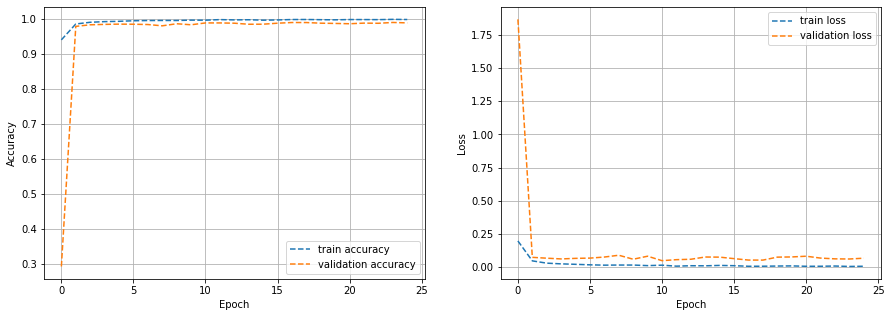

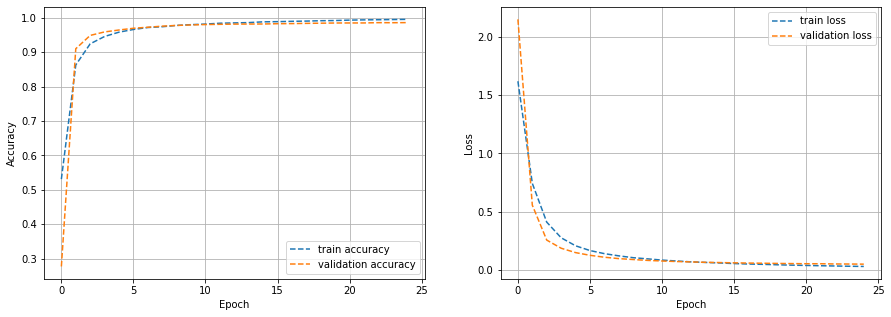

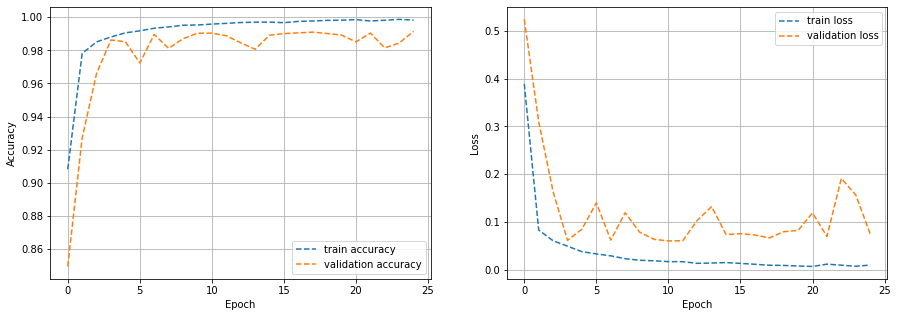

In [22]:
for h in model_history:
    plot_graph(h)


In [23]:
test_loss, test_acc = model_1.evaluate(x_test_norm, y_test)
print('\nTest Accuracy:', test_acc*100)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 2s 5ms/step - loss: 0.0694 - accuracy: 0.9879

Test Accuracy: 98.79000186920166

Test Loss: 0.06936822086572647


In [24]:
test_loss, test_acc = model_2.evaluate(x_test_norm, y_test)
print('\nTest Accuracy:', test_acc*100)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 5ms/step - loss: 0.0426 - accuracy: 0.9870

Test Accuracy: 98.69999885559082

Test Loss: 0.042565979063510895


In [25]:
test_loss, test_acc = model_3.evaluate(x_test_norm, y_test)
print('\nTest Accuracy:', test_acc*100)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 2s 5ms/step - loss: 0.0583 - accuracy: 0.9931

Test Accuracy: 99.30999875068665

Test Loss: 0.058274950832128525
